<h1 align="center">Volume 1: Facial Recognition</h1>

    <Name> (double-click to edit)
    <Class>
    <Date>
    


$##Note the data base of images is not included due to size constraints

In [1]:
import numpy as np
from os import walk
from scipy.misc import imread
from scipy import linalg as la

from matplotlib import pyplot as plt, rcParams
%matplotlib inline
# rcParams["figure.figsize"] = (16,12)    # Use this line to increase your figure size (optional).



In [3]:
f=get_faces()
f.shape
print(f.shape)




(36000, 153)


### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, flatten=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, flatten=True))

In [3]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    image=image.reshape((m,n))
    plt.imshow(image, cmap='gray')
    plt.show()

(36000, 153)


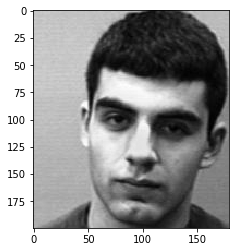

In [4]:
# Show a face from the faces94 dataset.
faces=get_faces()
print(faces.shape)
show(faces[:,22])

## Facial Recognition Class

In [5]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        faces: a list of the flattened image matrices
        mue: the flattened matrix of average values across all images, or the mean face
        mean_shift: the array of images minus the mean
        U: the u from the svd decomposition of 
        
    """

    def __init__(self, path='./faces94'):
        """Initialize all attributes.
        This is the main part of the computation.
        """
        self.faces=get_faces(path)
        self.mue=np.mean(self.faces, axis=1)
        self.mean_shift=(self.faces.T-self.mue).T
        self.U=la.svd(self.mean_shift)[0]

    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        return self.U[:,:s].T @ A
        

    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.
        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        big_f_hat=self.project(self.mean_shift,s)
        g_hat=self.project(g-self.mue,s)
        return np.argmin(la.norm(big_f_hat.T-g_hat,axis=1))
        

    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        show(image,m,n)
        show(self.faces[:,self.find_nearest(image)])

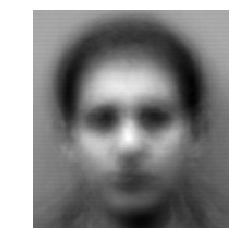

In [6]:
# Display the mean face.
face_c=FacialRec()
plt.axis("off")
show(face_c.mue)

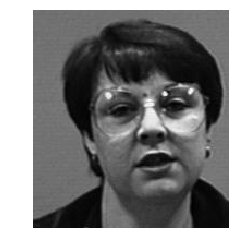

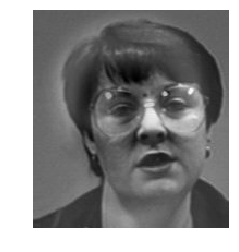

In [11]:
# Display an image along with its mean-shifted face.
plt.axis("off")
show(face_c.faces[:,0])
plt.axis("off")
show(face_c.mean_shift[:,0])

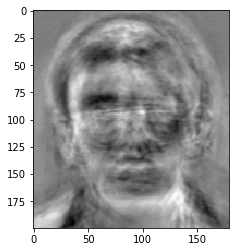

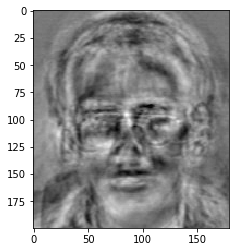

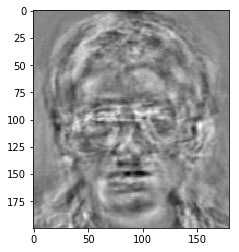

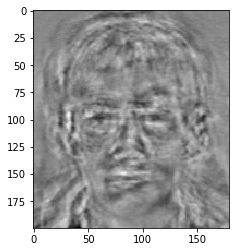

In [10]:
#show projection of an image onto several sub_spaces of increasing dimension
show(face_c.U[:,25])
show(face_c.U[:,50])
show(face_c.U[:,75])
show(face_c.U[:,100])



- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

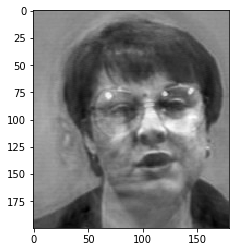

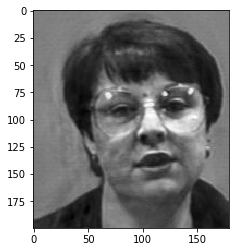

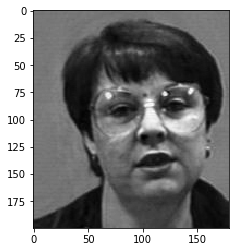

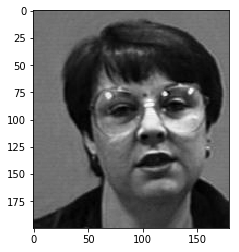

In [9]:
# Display a face image reconstructed with various numbers of eigenfaces.
f_hat1=face_c.project(face_c.mean_shift[:,0],25)
f_hat2=face_c.project(face_c.mean_shift[:,0],50)
f_hat3=face_c.project(face_c.mean_shift[:,0],75)
f_hat4=face_c.project(face_c.mean_shift[:,0],100)
f_tilde1=face_c.U[:,:25] @ f_hat1 + face_c.mue
f_tilde2=face_c.U[:,:50] @ f_hat2 + face_c.mue
f_tilde3=face_c.U[:,:75] @ f_hat3 + face_c.mue
f_tilde4=face_c.U[:,:100] @ f_hat4 + face_c.mue
show(f_tilde1)
show(f_tilde2)
show(f_tilde3)
show(f_tilde4)


- Implement `FacialRec.match_face()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match_faces()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

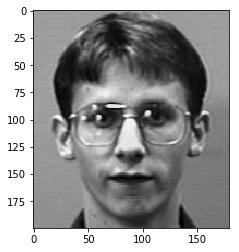

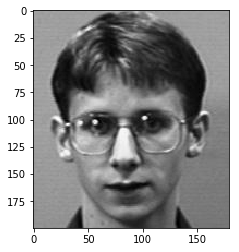

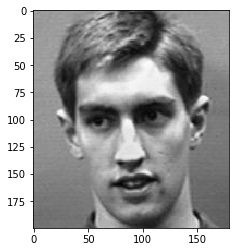

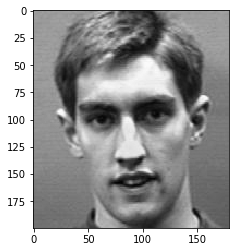

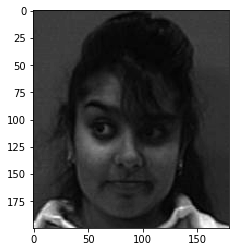

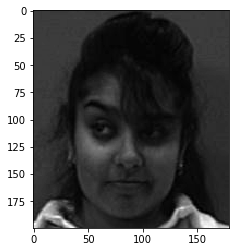

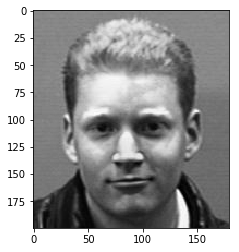

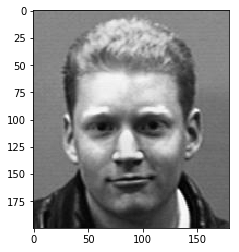

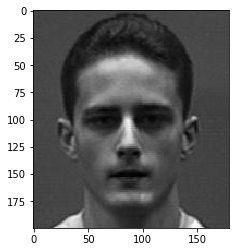

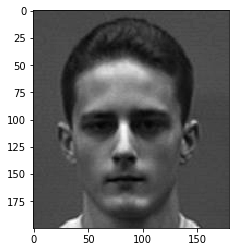

In [9]:
# Display some random images along with their closest match.
for test in sample_faces(5):
    face_c.match(test)
#we can see that it looks like our software correctly classified these five random images